In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0

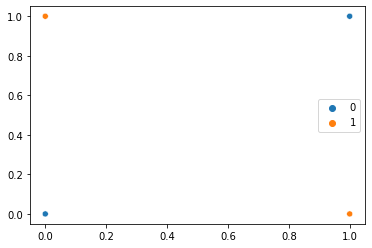

In [2]:
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,0,1])
y_train = np.array([0,1,1,0])

X = np.array([x1,x2]).T

df = pd.DataFrame(np.array([x1,x2,y_train]).T,columns=['x1','x2','y'])
sns.scatterplot(x=x1, y=x2, hue=y_train)
df

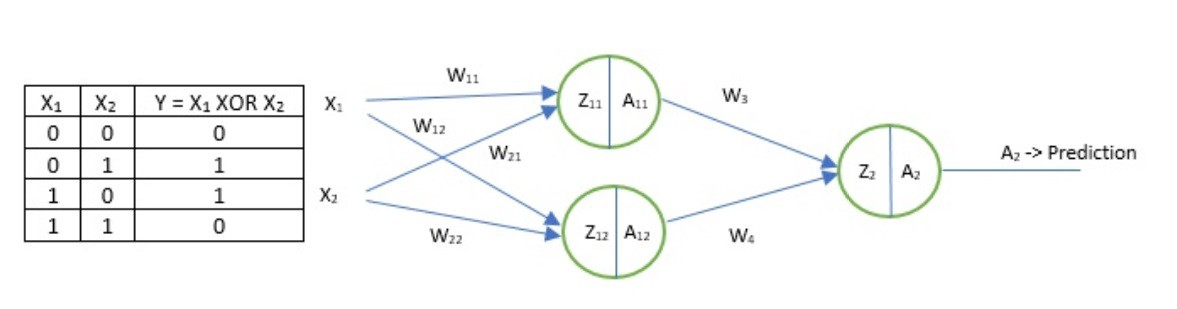

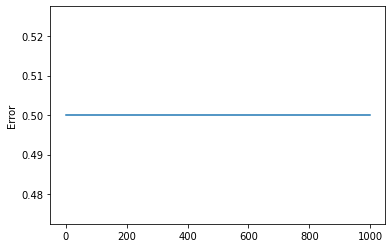

In [16]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

def forward_prop(w1,w2,x):
    z1 = np.dot(x,w1)
    a1 = sigmoid(z1)    
    z2 = np.dot(a1,w2)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

def back_prop(w1,w2,z1,a1,z2,a2,x,y):
    
    # dL/dw2 = dL/dypred * dypred/dw2
    # dL/dw2 = -2(y - a2) * a1
    
    # dL/dw1 = dL/dypred * dypred/da1 * da1/dz1 * dz1/dw1
    # dL/dw1 = -2(y - a2) * w2 * d_sigmoid(z1) * x

    dl_ypred = -2 * (y - a2)  # 1x1
    dw2 = dl_ypred * a1.T     # 1x2
    
    da1_dw1 = np.outer(d_sigmoid(z1),x) # 2x2 | (da1/dz1 * dz1/dw1)
    dypred_dw1 = (da1_dw1.T * w2).T     # 2x2 | (dypred/da1 * da1/dz1 * dz1/dw1)
    dw1 = dl_ypred * dypred_dw1         # 2x2
    
    return dw1,dw2

def predict(w1,w2,x):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    pred = np.array(a2)
    return np.array(pred>=.5,dtype=int)

n,m = X.shape
EPOCH = 1000
lr = 0.01

# Initialize weights
w1 = np.random.uniform(0,1,(2,2)) # w layer 1
w2 = np.random.uniform(0,1,2) # w layer 2

# Error 
loss_acum = []

for e in range(EPOCH):
    for i in range(n):
        x = []
        for j in range(m):
            x.append(X[i,j])
        x = np.array(x)
        y = y_train[i]
    
        # Foward propagation
        z1,a1,z2,a2 = forward_prop(w1,w2,x)
        
        # Backward propagation
        dw1, dw2 = back_prop(w1,w2,z1,a1,z2,a2,x,y)
        
        # Update wight
        w1 = w1 - lr * dw1
        w2 = w2 - lr * dw2
        
    # Test eroror    
    # loss = (y - a2)**2
    loss_acum.append(mean_squared_error(y_train,predict(w1,w2,X)))

plt.plot(np.linspace(0,len(loss_acum)-1,len(loss_acum)),loss_acum)
plt.ylabel('Error')
plt.show()